In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import math

# Derivatives

[]

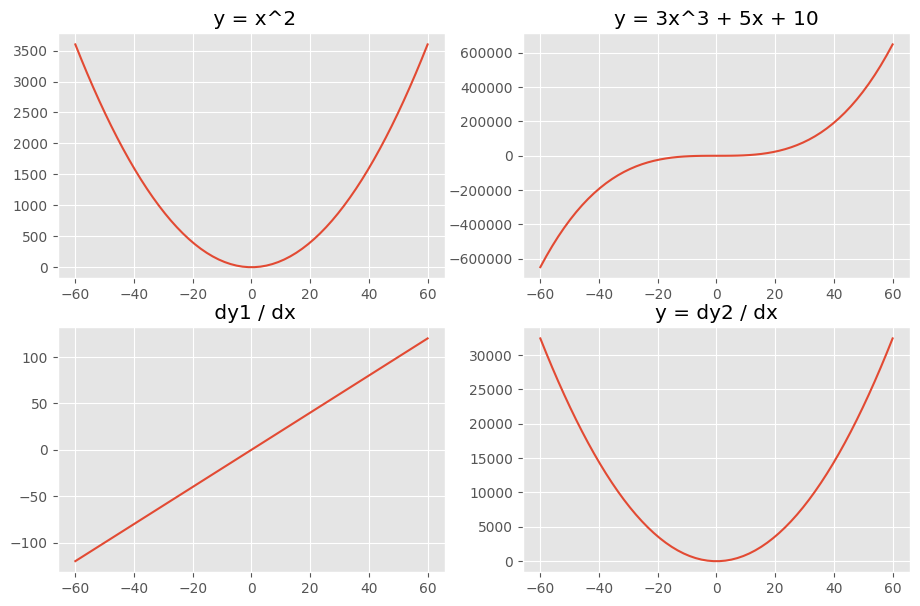

In [4]:
def f1(x): # y=x^2
    y = x**2 
    return y 

def f2(x): # y=3x^3 + 5x + 10
    y = 3*(x**3) + 5*x + 10
    return y

def f1_prime(x):
    return 2*x

def f2_prime(x):
    return 9*x**2 + 5

plt.figure(figsize=(11,7)) #w,h

values = np.linspace(start=-60, stop=60, num=60) #evenly spaced samples form start to stop
plt.subplot(2,2,1)
y1 = f1(values)
plt.plot(values, y1)
plt.title(" y = x^2")
plt.plot()

plt.subplot(2,2,2)
y2 = f2(values)
plt.plot(values, y2)
plt.title("y = 3x^3 + 5x + 10")
plt.plot()

plt.subplot(2,2,3)
y1_1 = f1_prime(values)
plt.plot(values, y1_1)
plt.title(" dy1 / dx")
plt.plot()

plt.subplot(2,2,4)
y2_1 = f2_prime(values)
plt.plot(values, y2_1)
plt.title("y = dy2 / dx")
plt.plot()

* Two different functions
* Lets try applying the derivative formula to them

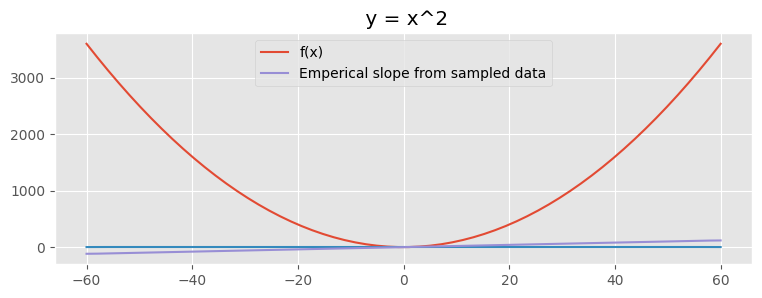

In [5]:
# For a singel varibale we apply partial derivative directly to the function

plt.figure(figsize=(9,3))

dy_dx = np.gradient(y1, values)
d2y_dx2 = np.gradient(dy_dx, values)
plt.title(" y = x^2")
plt.plot(values, y1, label = "f(x)")
plt.plot(values, d2y_dx2)
plt.plot(values, dy_dx, label = "Emperical slope from sampled data")
plt.legend()

Method is still an approximation and may not be exactly accurate. Depends on the spacing of the data and how easy it is to approximate the function.

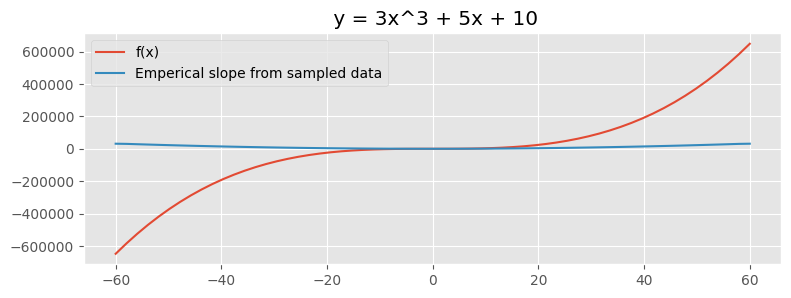

In [6]:
plt.figure(figsize=(9,3))

dy_dx = np.gradient(y2, values)
d2y_dx2 = np.gradient(dy_dx, values)
plt.title(" y = 3x^3 + 5x + 10")
plt.plot(values, y2, label = "f(x)")
plt.plot(values, dy_dx, label = "Emperical slope from sampled data")
plt.legend()

In [7]:
def func(x):
    return 3*(x**3) + 5*x + 10

def loss(x):
    return 9*(x**2) + 5 # Hardcoded first derivative of the function

x0 = 10 # Random starting point we have chosen
lr = 0.0001 #Step size | Learning Rate 
max_steps = 20
tolerance = 1e-8 

In [8]:
# Defining the hyperparameters 

xs = [x0]
fs = [func(x0)]
x = x0

In [9]:
for step in range(max_steps):
    grad = loss(x) #Slope or gradient at current value of x
    x = x - (lr*grad) #Gradient descent update :-> Going in the opposite direction of the slope
    xs.append(x) # History of x values
    fs.append(func(x)) # History of the gradients for every x
    if(abs(grad) < tolerance):
        break 

* Go each step, start with a random value of x
* Compute the gradient for each value of x
* Take a step 'downhill'
* Record the new 'point' 
* Stop when the number of steps is reached or gradient(slope) is ~ 0 --- Meaning min. has been reached

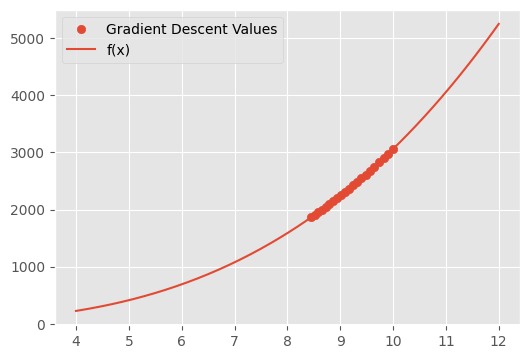

In [10]:
plt.figure(figsize=(6,4.1))
x_curve = np.linspace(x0-6, x0+2, 200)
y_curve = func(x_curve)
plt.scatter(xs, fs, label="Gradient Descent Values")
plt.plot(x_curve, y_curve, label="f(x)")
plt.legend()

The visualizations for both the graphs dont look the same because of the scaling. The range of values used in both the functions is very different. The one with the gradient slope is very small, so the resultant graph looks like a subset of the larger one. Think of this as a small tail in the resultant larger graph.

Text(0.5, 1.0, 'f3')

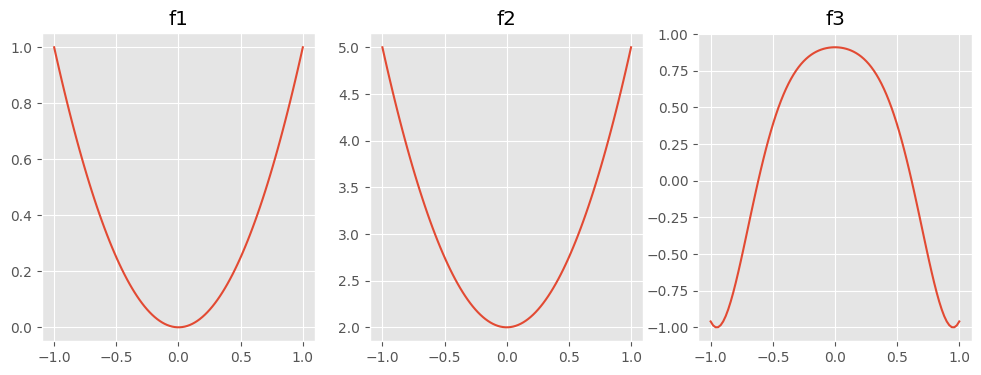

In [11]:
#Define functions
def f1(x): # y = x^2
    return x**2

def f2(x): # y = 3x + 2
    return 3*x + 2

def f3(x): # y = sin(x)    
    return np.sin(x)


#Define the derivatives
def f1_prime(x):
    return 2*x

def f2_prime(x):
    return 3

def f3_prime(x):
    return np.cos(x)

# Composite function
def f_composite(x):
    return f3(f2(f1(x)))

#derivative via chain rule 
def f_composite_prime(x):
    return f3_prime(f2(f1(x))) * f2_prime(f1(x)) * f1_prime(x)

x = np.linspace(-1, 1, 100)

y1 = f1(x)
y2 = f2(f1(x))
y3 = f3(f2(f1(x)))

y_comp = f_composite(x)

y_comp_prime = f_composite_prime(x)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(x, y1, label="f1(x)")
plt.title("f1")

plt.subplot(1,3,2)
plt.plot(x, y2, label="f2(x)")
plt.title("f2")

plt.subplot(1,3,3)
plt.plot(x, y3, label="f3(x)")
plt.title("f3")

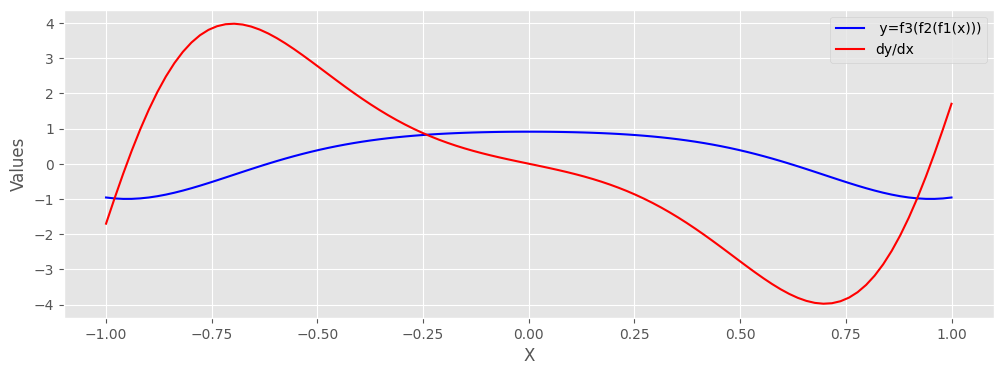

In [12]:
plt.figure(figsize=(12,4))

plt.plot(x, y_comp, label=" y=f3(f2(f1(x)))", color="blue")
plt.plot(x, y_comp_prime, label= "dy/dx", color="red")
plt.xlabel("X")
plt.ylabel("Values")
plt.legend()

# Basic NN

* 3 Layers
1. h1 = f1(x)
2. h2 = f2(h1)
3. y = f3(h2)

In [15]:
x = 3.0 #input feature/variable 
t = 5.0 # Actual value/target/label

# Initialize weights randomly (though we'll be hardcoding them here at least)
w1, w2, w3 = 0.4, -0.9, 1.5
lr = 0.001

In [16]:
# Forward pass 
h1 = w1*x
h2 = w2*h1 
y = w3*h2 

loss = (y-t)**2 #Basic Squared error loss function

#Backward pass using Chain Rule -> we need partial derivatives of all 3 layers or we can say weights along with the functions
dl_dy = 2*(y-t)

dl_dw3 = dl_dy*h2  # 2(y-t).h2

dl_dh2 = dl_dy*w3 # 2(y-t).w3
dl_dw2 = dl_dh2*h1   # 2(y-t).w3.h1

dl_dh1 = dl_dw2*w2 # 2(y-t).w3.w2
dl_dw1 = dl_dh1*x # 2(y-t).w3.w2.x

print(f"Gradients dw1 = {dl_dw1:.3f}, dw2 = {dl_dw2:.3f}, dw3 = {dl_dw3:.3f}")

#Update weights - Gradient Descent

w1 = w1 - lr*dl_dw1
w2 = w2 - lr*dl_dw2 
w3 = w3 - lr*dl_dw3 

print(f"Updated Weights are w1 = {w1:.3f}, w2 = {w2:.3f}, w3 = {w3:.3f}")

Gradients dw1 = 64.346, dw2 = -23.832, dw3 = 14.299
Updated Weights are w1 = 0.336, w2 = -0.876, w3 = 1.486


Lets get into what a simulated model training will look like

In [17]:
def forward(x, w1, w2, w3):
    h1 = w1*x 
    h2 = w2*h1 
    y = w3*h2
    cache = (x, h1, h2, w1, w2, w3, y) #For backprop,
    loss = (y - t)**2
    return y, loss, cache 

def backward(cache):
    x, h1, h2, w1, w2, w3, y = cache 
    dl_dy = 2*(y-t)
    dl_dw3 = dl_dy*h2 
    dl_dh2 = dl_dy*w3
    dl_dw2 = dl_dh2*h1 
    dl_dh1 = dl_dw2*w2 
    dl_dw1 = dl_dh1*x 
    grad_norm = math.sqrt(dl_dw1**2 + dl_dw2**2 + dl_dw3**2) #Magnitude of gradient vector 
    return dl_dw1, dl_dw2, dl_dw3, grad_norm

In [18]:
epochs = 100

history = {
    "loss" : [],
    "y" : [],
    "w1" : [],
    "w2" : [],
    "w3" : [],
    "gradient_norm" : []
} 

for epoch in range(epochs):
    y, loss, cache = forward(x, w1, w2, w3) #Forward Pass
    
    g1, g2, g3, grad_norm = backward(cache) #Backward pass 

    #Gradient descent - Weights update 
    w1 = w1 - lr*g1 
    w2 = w2 - lr*g2 
    w3 = w3 - lr*g3 

    history["loss"].append(loss)
    history["y"].append(y)
    history["w1"].append(w1)
    history["w2"].append(w2)
    history["w3"].append(w3)
    history["gradient_norm"].append(grad_norm)

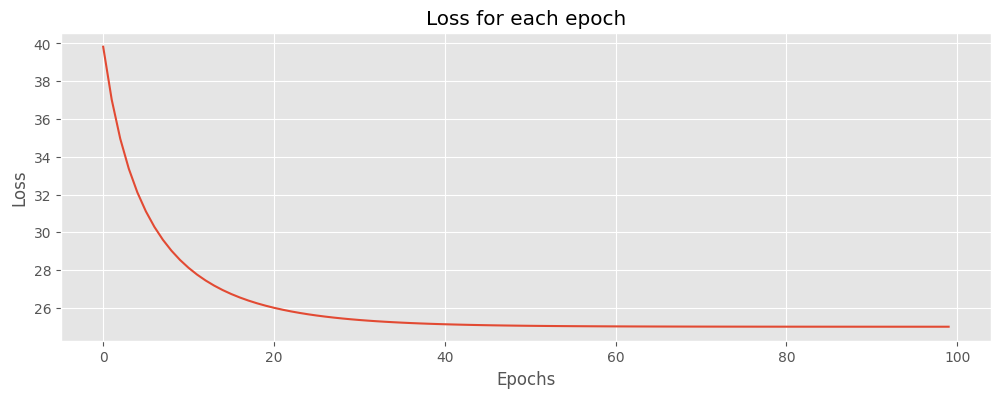

In [20]:
plt.figure(figsize=(12,4))

plt.plot(history["loss"])
plt.title("Loss for each epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

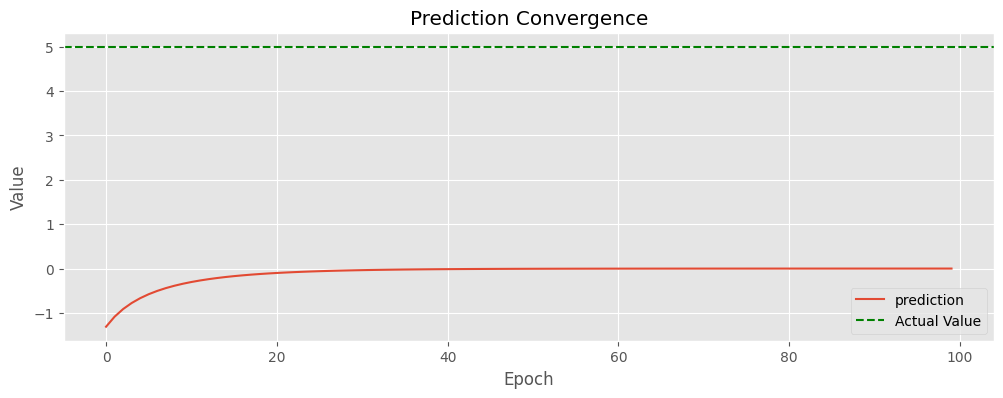

In [23]:
plt.figure(figsize=(12,4))

plt.plot(history["y"], label="prediction")
plt.axhline(t, label="Actual Value", color="green", linestyle="--")
plt.title("Prediction Convergence")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

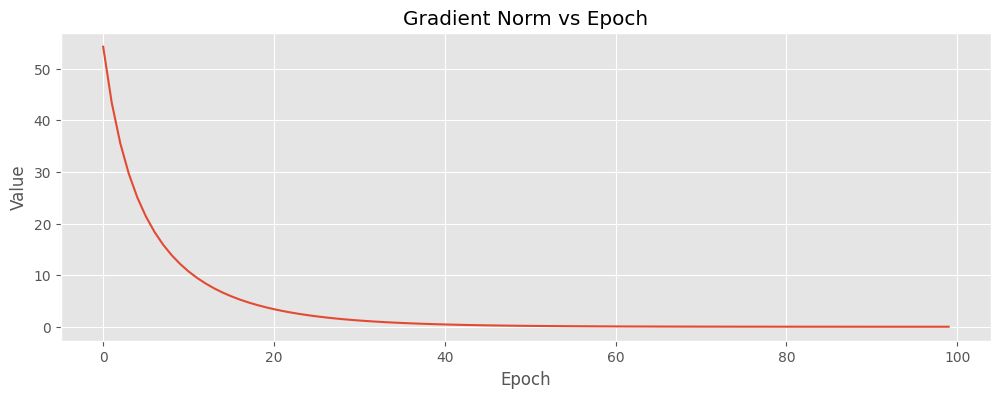

In [24]:
plt.figure(figsize=(12,4))

plt.plot(history["gradient_norm"])
plt.title("Gradient Norm vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

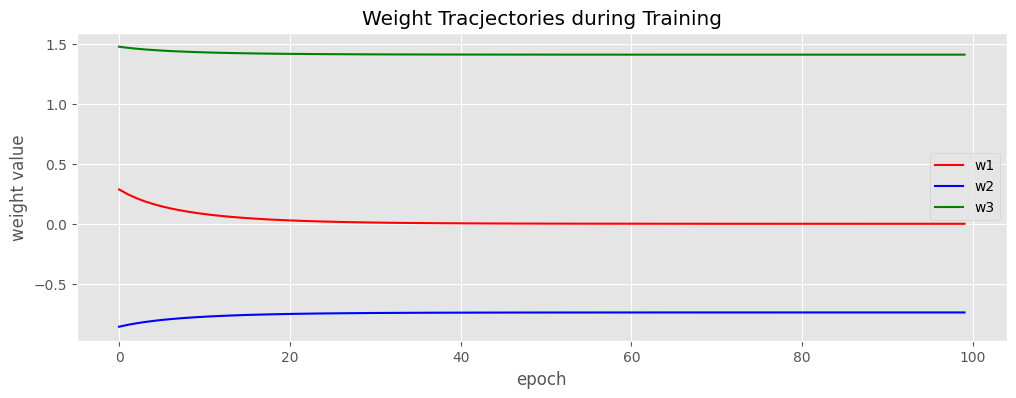

In [28]:
plt.figure(figsize=(12,4))

plt.title("Weight Tracjectories during Training")
plt.plot(history["w1"], label="w1", color="red")
plt.plot(history["w2"], label="w2", color="blue")
plt.plot(history["w3"], label="w3", color="green")

plt.xlabel("epoch")
plt.ylabel("weight value")
plt.legend()